In [44]:
import pandas  as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.neighbors import KNeighborsClassifier

In [2]:

# 1. Fucntion to create piechart 

def create_piechart(data, column):
    """
    Objective
    ---------- 
    Create Pichart for Categorical varaibles present in Pandas Dataframe
    
    parameters
    ----------
    data: this is pandas dataframe
    column: this is column name which is used to create plot
        
    returns
    ----------
    this will show piechart
    
    """
    labels = list(data[column].value_counts().to_dict().keys())
    sizes = list(data[column].value_counts().to_dict().values())
   
    plt.pie(sizes, 
            labels=labels, 
            autopct='%1.2f%%',
            shadow=False, 
            startangle=45)
    
    plt.axis('equal')  
    plt.title("Piechart - {}".format(column))
    plt.show()
    
# 1. Fucntion to check missing data 
    
def missing_data(df):
    """
    Objective
    ----------
    it shows the missing data in each column with 
    total missing values, percentage of missing value and
    its data type in descending order.
    
    parameters
    ----------
    df: pandas dataframe
        input data frame 
    
    returns
    ----------
    missing_data: output data frame(pandas dataframe)
    
    """
    
    total = df.isnull().sum().sort_values(ascending=False)
    
    percent = round((df.isnull().sum()/df.isnull().count()  * 100).sort_values(ascending=False),2)
    
    data_type = df.dtypes
    missing_data = pd.concat([total,percent,data_type],
                             axis=1,
                             keys=['Total','Percent','Data_Type']).sort_values("Total", 
                                                                               axis = 0,
                                                                               ascending = False)
    
    return missing_data


In [3]:
#Read the training data and testing data
train_df = pd.read_excel('Titanic_Survival_train.xls', 
                         index_col=0, 
                         header=0)

test_df = pd.read_excel('Titanic_Survival_test.xls', 
                        index_col=0, 
                        header=0)

print(train_df.shape)
print(test_df.shape)

(891, 11)
(21, 11)


In [4]:
train_df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
train_df.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')

# Step 2: EDA

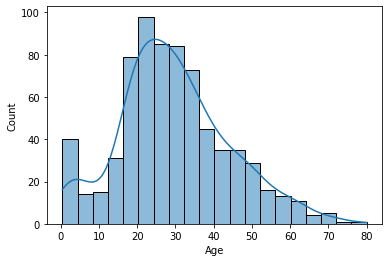

In [6]:
# Plot histogram
sns.histplot(data = train_df, x="Age", kde = True)
plt.show()

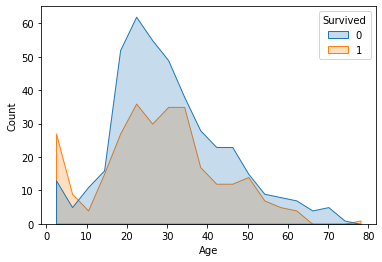

In [7]:
sns.histplot(data = train_df, 
             x="Age",
             kde = False,
             hue="Survived",
             element="poly")
plt.show()

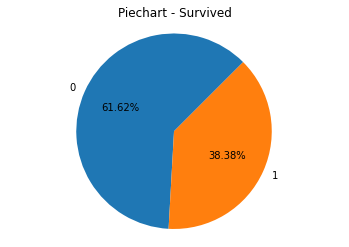

In [8]:
create_piechart(train_df, "Survived")

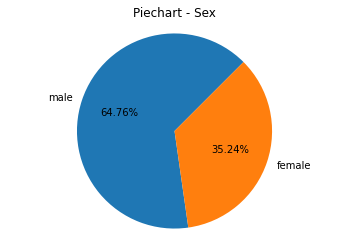

In [9]:
create_piechart(train_df, "Sex")

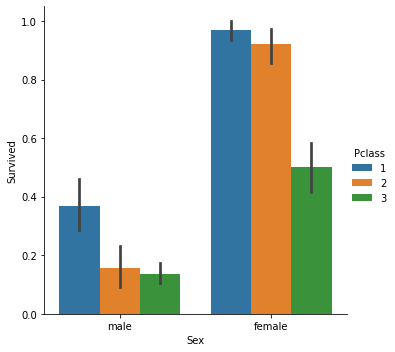

In [10]:
sns.catplot(data=train_df, 
           x="Sex",
           y="Survived",
           hue="Pclass",
           kind="bar")
plt.show()

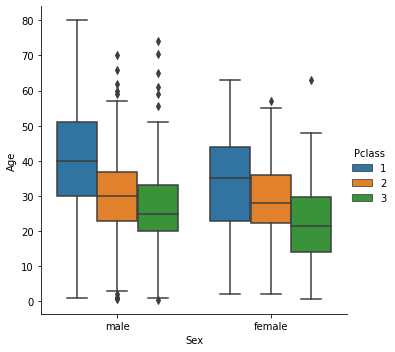

In [11]:
sns.catplot(data=train_df, 
           x="Sex",
           y="Age",
           hue="Pclass",
           kind="box")
plt.show()

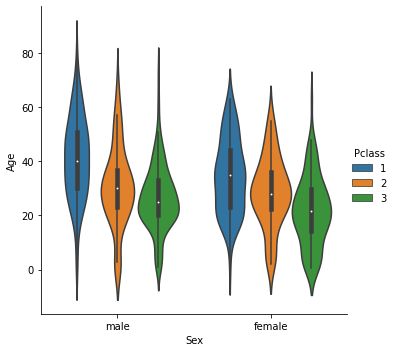

In [12]:
sns.catplot(data=train_df, 
           x="Sex",
           y="Age",
           hue="Pclass",
           kind="violin")
plt.show()

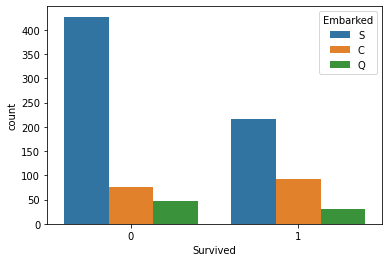

In [13]:
sns.countplot(x="Survived", hue="Embarked", data=train_df)
plt.show()

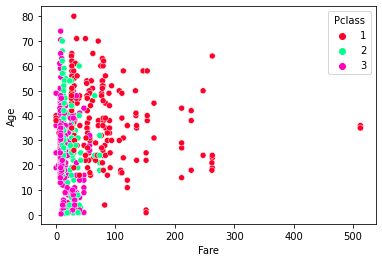

In [14]:
sns.scatterplot(data=train_df, 
                x="Fare", 
                y="Age", 
                hue="Pclass", 
                palette="gist_rainbow")
plt.show()

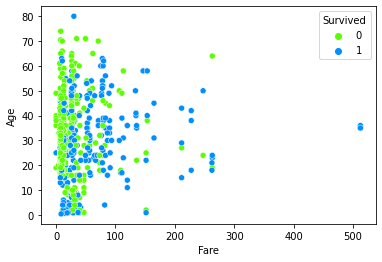

In [15]:
sns.scatterplot(data=train_df, 
                x="Fare", 
                y="Age", 
                hue="Survived", 
                palette="gist_rainbow")
plt.show()

### Step 3: Data Preprocessing 

In [16]:
train_df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [17]:
#feature selection 
train_df = train_df[['Name','Pclass','Sex','Age','Survived']]
test_df = test_df[['Name','Pclass','Sex','Age','Survived']]


In [18]:
#finding the missing values
print(train_df.isnull().sum())
print()
print(test_df.isnull().sum())

Name          0
Pclass        0
Sex           0
Age         177
Survived      0
dtype: int64

Name        0
Pclass      0
Sex         0
Age         2
Survived    0
dtype: int64


In [19]:
#imputing numerical missing data with mean value
train_df["Age"].fillna(train_df["Age"].mean(), inplace=True)

#imputing numerical missing data with mean value
test_df["Age"].fillna(test_df["Age"].mean(),inplace=True)

In [20]:
#finding the missing values
print(train_df.isnull().sum())
print()
print(test_df.isnull().sum())

Name        0
Pclass      0
Sex         0
Age         0
Survived    0
dtype: int64

Name        0
Pclass      0
Sex         0
Age         0
Survived    0
dtype: int64


In [21]:
train_df["Sex"]=train_df["Sex"].map({"male":0,"female":1})
test_df["Sex"]=test_df["Sex"].map({"male":0,"female":1})

In [22]:
train_df.head()

,Name,Pclass,Sex,Age,Survived
PassengerId,,,,,
1,"Braund, Mr. Owen Harris",3,0,22.0,0
2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,1,38.0,1
3,"Heikkinen, Miss. Laina",3,1,26.0,1
4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,1,35.0,1
5,"Allen, Mr. William Henry",3,0,35.0,0


In [ ]:
#transforming categorical data to numerical

# from sklearn import preprocessing

# colname=['Sex']

# le=preprocessing.LabelEncoder()

# for x in colname:
#     training_data[x]=le.fit_transform(training_data[x])
#     testing_data[x]=le.fit_transform(testing_data[x])
    
# training_data['Sex']=training_data['Sex'].map({"female":0, "male":1})
# testing_data['Sex']=testing_data['Sex'].map({"female":0, "male":1})

In [ ]:
# training_data.drop("sex1", inplace=True, axis=1)

In [ ]:
testing_data.head()

In [23]:
train_df.tail()

,Name,Pclass,Sex,Age,Survived
PassengerId,,,,,
887,"Montvila, Rev. Juozas",2,0,27.000000,0
888,"Graham, Miss. Margaret Edith",1,1,19.000000,1
889,"Johnston, Miss. Catherine Helen ""Carrie""",3,1,29.699118,0
890,"Behr, Mr. Karl Howell",1,0,26.000000,1
891,"Dooley, Mr. Patrick",3,0,32.000000,0


In [24]:
test_df.head(23)

,Name,Pclass,Sex,Age,Survived
PassengerId,,,,,
871,"Balkic, Mr. Cerin",3,0,26.000000,0
872,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",1,1,47.000000,1
873,"Carlsson, Mr. Frans Olof",1,0,33.000000,0
874,"Vander Cruyssen, Mr. Victor",3,0,47.000000,0
875,"Abelson, Mrs. Samuel (Hannah Wizosky)",2,1,28.000000,1
876,"Najib, Miss. Adele Kiamie ""Jane""",3,1,15.000000,1
877,"Gustafsson, Mr. Alfred Ossian",3,0,20.000000,0
878,"Petroff, Mr. Nedelio",3,0,19.000000,0
879,"Laleff, Mr. Kristo",3,0,29.842105,0


In [ ]:
train_df.tail(23)

In [26]:
X_train=train_df.values[:870,  1:-1] # variables from pclass to age [ observation ,  columns]
y_train=train_df.values[:870,   -1] # passangersIds from 1 to 870 
y_train=y_train.astype(int)

X_test=test_df.values[:, 1:-1]
y_test=test_df.values[:, -1]
y_test=y_test.astype(int)

In [27]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# mean = 0 and std = 1
scaler = StandardScaler()

scaler.fit(X_train)

X_train_scale = scaler.transform(X_train)
X_test_scale = scaler.transform(X_test)
# while working on separate train and test data, fit the scaler oject only uplon the train data
# and use the same scaler object to transform both the train as well as the test data.

In [28]:
X_train_scale

array([[ 8.28102044e-01, -7.34726486e-01, -5.89320802e-01],
       [-1.56541549e+00,  1.36105070e+00,  6.35879178e-01],
       [ 8.28102044e-01,  1.36105070e+00, -2.83020807e-01],
       ...,
       [-1.56541549e+00, -7.34726486e-01,  9.98541867e-02],
       [ 8.28102044e-01, -7.34726486e-01,  2.39122131e-04],
       [ 8.28102044e-01, -7.34726486e-01, -1.96767078e+00]])

In [29]:
X_test_scale

array([[ 0.82810204, -0.73472649, -0.28302081],
       [-1.56541549,  1.3610507 ,  1.32505417],
       [-1.56541549, -0.73472649,  0.25300418],
       [ 0.82810204, -0.73472649,  1.32505417],
       [-0.36865672,  1.3610507 , -0.12987081],
       [ 0.82810204,  1.3610507 , -1.12534579],
       [ 0.82810204, -0.73472649, -0.7424708 ],
       [ 0.82810204, -0.73472649, -0.8190458 ],
       [ 0.82810204, -0.73472649,  0.0111884 ],
       [-1.56541549,  1.3610507 ,  2.01422916],
       [-0.36865672,  1.3610507 , -0.35959581],
       [ 0.82810204, -0.73472649,  0.25300418],
       [ 0.82810204,  1.3610507 , -0.5893208 ],
       [-0.36865672, -0.73472649, -0.12987081],
       [ 0.82810204, -0.73472649, -0.35959581],
       [ 0.82810204,  1.3610507 ,  0.71245418],
       [-0.36865672, -0.73472649, -0.20644581],
       [-1.56541549,  1.3610507 , -0.8190458 ],
       [ 0.82810204,  1.3610507 ,  0.0111884 ],
       [-1.56541549, -0.73472649, -0.28302081],
       [ 0.82810204, -0.73472649,  0.176

## 1. Using Logistci regression 

In [31]:
#create a model
classifier=LogisticRegression()

#fitting training data to the model
classifier.fit(X_train_scale, y_train)



# print(list(zip(y_test,y_pred)))

[(0, 0), (1, 1), (0, 0), (0, 0), (1, 1), (1, 1), (0, 0), (0, 0), (0, 0), (1, 1), (1, 1), (0, 0), (0, 1), (0, 0), (0, 0), (0, 0), (0, 0), (1, 1), (0, 1), (1, 1), (0, 0)]


### Test Data Eval

In [45]:
#predict using the model
y_pred=classifier.predict(X_test_scale)

cfm=confusion_matrix(y_test, y_pred)
print(cfm)

print("Classification report: ")

print(classification_report(y_test, y_pred))

acc=accuracy_score(y_test, y_pred)
print("Accuracy of the model: ",acc)

[[12  2]
 [ 0  7]]
Classification report: 
              precision    recall  f1-score   support

           0       1.00      0.86      0.92        14
           1       0.78      1.00      0.88         7

    accuracy                           0.90        21
   macro avg       0.89      0.93      0.90        21
weighted avg       0.93      0.90      0.91        21

Accuracy of the model:  0.9047619047619048


### Training Data Eval 

In [46]:
#predict using the model
y_pred=classifier.predict(X_train_scale)

cfm=confusion_matrix(y_train, y_pred)
print(cfm)

print("Classification report: ")

print(classification_report(y_train, y_pred))

acc=accuracy_score(y_train, y_pred)
print("Accuracy of the model: ",acc)



[[459  76]
 [100 235]]
Classification report: 
              precision    recall  f1-score   support

           0       0.82      0.86      0.84       535
           1       0.76      0.70      0.73       335

    accuracy                           0.80       870
   macro avg       0.79      0.78      0.78       870
weighted avg       0.80      0.80      0.80       870

Accuracy of the model:  0.7977011494252874


## Using KNN 

In [62]:
#predicting using the KNeighbors_Classifier
model_KNN = KNeighborsClassifier(n_neighbors=85)

#fit the model on the data and predict the values
model_KNN.fit(X_train_scale,y_train)


KNeighborsClassifier(n_neighbors=85)

### Test Data Eval

In [63]:
#predict using the model
y_pred= model_KNN.predict(X_test_scale)

cfm=confusion_matrix(y_test, y_pred)
print(cfm)

print("Classification report: ")

print(classification_report(y_test, y_pred))

acc=accuracy_score(y_test, y_pred)
print("Accuracy of the model: ",acc)

[[11  3]
 [ 1  6]]
Classification report: 
              precision    recall  f1-score   support

           0       0.92      0.79      0.85        14
           1       0.67      0.86      0.75         7

    accuracy                           0.81        21
   macro avg       0.79      0.82      0.80        21
weighted avg       0.83      0.81      0.81        21

Accuracy of the model:  0.8095238095238095


In [54]:
#predict using the model
y_pred= model_KNN.predict(X_train_scale)

cfm=confusion_matrix(y_train, y_pred)
print(cfm)

print("Classification report: ")

print(classification_report(y_train, y_pred))

acc=accuracy_score(y_train, y_pred)
print("Accuracy of the model: ",acc)

[[474  61]
 [100 235]]
Classification report: 
              precision    recall  f1-score   support

           0       0.83      0.89      0.85       535
           1       0.79      0.70      0.74       335

    accuracy                           0.81       870
   macro avg       0.81      0.79      0.80       870
weighted avg       0.81      0.81      0.81       870

Accuracy of the model:  0.8149425287356322


In [67]:


acc_dict = dict()

for K in range(1, 31):
    
    # create object with k value
    model_KNN = KNeighborsClassifier(K, metric='euclidean')
    
    # model fit 
    model_KNN.fit(X_train_scale, y_train) 
    
    # model prediction
    y_pred = model_KNN.predict(X_test_scale)
    
    acc_score= round(accuracy_score(y_test, y_pred),2 )
    
    # print accuracy score
    print("Accuracy is: {} for K-Value: {}".format(acc_score,K))
    acc_dict[K] = acc_score

Accuracy is: 0.86 for K-Value: 1
Accuracy is: 0.86 for K-Value: 2
Accuracy is: 0.86 for K-Value: 3
Accuracy is: 0.9 for K-Value: 4
Accuracy is: 0.9 for K-Value: 5
Accuracy is: 0.9 for K-Value: 6
Accuracy is: 0.86 for K-Value: 7
Accuracy is: 0.86 for K-Value: 8
Accuracy is: 0.81 for K-Value: 9
Accuracy is: 0.9 for K-Value: 10
Accuracy is: 0.81 for K-Value: 11
Accuracy is: 0.9 for K-Value: 12
Accuracy is: 0.86 for K-Value: 13
Accuracy is: 0.9 for K-Value: 14
Accuracy is: 0.86 for K-Value: 15
Accuracy is: 0.86 for K-Value: 16
Accuracy is: 0.86 for K-Value: 17
Accuracy is: 0.86 for K-Value: 18
Accuracy is: 0.81 for K-Value: 19
Accuracy is: 0.86 for K-Value: 20
Accuracy is: 0.81 for K-Value: 21
Accuracy is: 0.81 for K-Value: 22
Accuracy is: 0.86 for K-Value: 23
Accuracy is: 0.81 for K-Value: 24
Accuracy is: 0.81 for K-Value: 25
Accuracy is: 0.86 for K-Value: 26
Accuracy is: 0.86 for K-Value: 27
Accuracy is: 0.86 for K-Value: 28
Accuracy is: 0.86 for K-Value: 29
Accuracy is: 0.86 for K-Value

In [68]:
for k in acc_dict:
    if acc_dict[k] == max(acc_dict.values()):
        print(k,":", acc_dict[k])

4 : 0.9
5 : 0.9
6 : 0.9
10 : 0.9
12 : 0.9
14 : 0.9


In [74]:
model = KNeighborsClassifier(n_neighbors=5, metric="euclidean", n_jobs=-1)

# model fit 
model.fit(X_train_scale, y_train) 

# model prediction
y_pred = model.predict(X_test_scale)


In [75]:
conf_matrix=confusion_matrix(y_test,y_pred)
print(conf_matrix)
print()


print("Classification report: ")

print(classification_report(y_test, y_pred))

acc_score=accuracy_score(y_test, y_pred)
print("Accuracy of the model: ",acc_score)

[[12  2]
 [ 0  7]]

Classification report: 
              precision    recall  f1-score   support

           0       1.00      0.86      0.92        14
           1       0.78      1.00      0.88         7

    accuracy                           0.90        21
   macro avg       0.89      0.93      0.90        21
weighted avg       0.93      0.90      0.91        21

Accuracy of the model:  0.9047619047619048


In [73]:
y_pred = model.predict(X_train_scale)

conf_matrix=confusion_matrix(y_train,y_pred)
print(conf_matrix)

print("Classification report: ")

print(classification_report(y_train,y_pred))

acc_score=accuracy_score(y_train, y_pred)
print("Accuracy of the model: ",acc_score)

[[486  49]
 [ 84 251]]
Classification report: 
              precision    recall  f1-score   support

           0       0.85      0.91      0.88       535
           1       0.84      0.75      0.79       335

    accuracy                           0.85       870
   macro avg       0.84      0.83      0.84       870
weighted avg       0.85      0.85      0.85       870

Accuracy of the model:  0.8471264367816091


# KNN Regression 

In [ ]:
df = pd.read_csv("Advertising.csv", index_col=0)

In [ ]:
df.head()

In [ ]:
df.isnull().sum()

In [ ]:
df.columns

In [ ]:
X  = df[['TV', 'radio', 'newspaper']]
Y = df['sales']

In [ ]:
from sklearn.model_selection import train_test_split
#Split the data into test and train
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3,
                                                    random_state=10)  

In [ ]:
#predicting using the KNeighbors_Classifier
from sklearn.neighbors import KNeighborsRegressor
model_KNN = KNeighborsRegressor(n_neighbors=3, metric="euclidean")
#fit the model on the data and predict the values
model_KNN.fit(X_train,Y_train)
Y_pred=model_KNN.predict(X_test)

In [ ]:
from sklearn.metrics import r2_score, mean_squared_error
r2 = r2_score(Y_test,Y_pred)
mse = mean_squared_error(Y_test,Y_pred)
print(r2)
print(mse)

In [ ]:
0.83
1.59

In [ ]:


acc_dict = dict()
for K in range(1, 31):
    
    # create object with k value
    model_KNN = KNeighborsRegressor(n_neighbors=K, metric="euclidean")
    
    # model fit 
    model_KNN.fit(X_train, Y_train) 
    
    # model prediction
    Y_pred = model_KNN.predict(X_test)
    
    r2 = r2_score(Y_test,Y_pred)
    
    # print accuracy score
    print("Accuracy is: {} for K-Value: {}".format(r2,K))
    acc_dict[K] =r2